The magnetic field is parallel with z.

Expectation values for the initial Hamiltonian:

|  $\ $    | $\langle H \rangle$ | $\langle S_z \rangle$ | $\langle L_z \rangle$ |
| --- | --- | --- | --- |
|Quanty | -6.875127 | -0.501166 | -1.392591 |
|TTMult | -6.87513  | -0.501166 | -1.392590 |


Expectation values for the final Hamiltonian:

|  $\ $    | $\langle H \rangle$ | $\langle S_z \rangle$ | $\langle L_z \rangle$ |
| --- | --- | --- | --- |
|Quanty | -7.180187 | -0.036884 | -0.669462 |
|TTMult | N/A | N/A | N/A | 

Timings:

|  $\ $    | Time (seconds) | 
| --- | --- |
|Quanty 1 CPU| 8 |
|Quanty 8 CPU| 2 |
|TTMult | 27 |

In [5]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import sys
import math

sys.path.insert(0, '../../utils')
from read_spectrum import read_ttmult_spectrum, read_quanty_spectrum

In [6]:
SHIFT = 715.43  # 715.4570

# Spectra

<IPython.core.display.Javascript object>


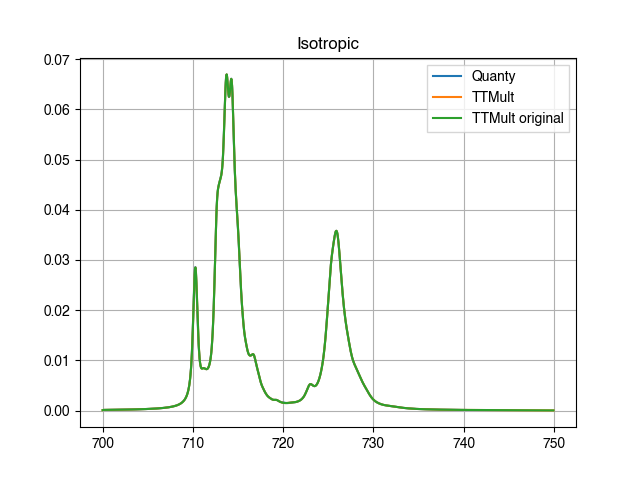

In [7]:
fig, ax = plt.subplots()
ax.grid()

x, y = read_quanty_spectrum('Quanty/input_iso.spec')
ax.plot(x + SHIFT, y, label='Quanty')
xiso_quanty = x
yiso_quanty = y

x, y, xsticks, ysticks = read_ttmult_spectrum('TTMult/input-3iso2K.xy')
# The isotropic spectrum from TTMult must be devided by 3.
y = y / 3
ax.plot(x, y, label='TTMult')
xiso_ttmult = x
yiso_ttmult = y

x, y, xsticks, ysticks = read_ttmult_spectrum('TTMult/original/fe3-C3v-Bz-3iso2K.xy')
y = y / 3
ax.plot(x, y, label='TTMult original')

plt.title('Isotropic')
ax.legend()

<IPython.core.display.Javascript object>


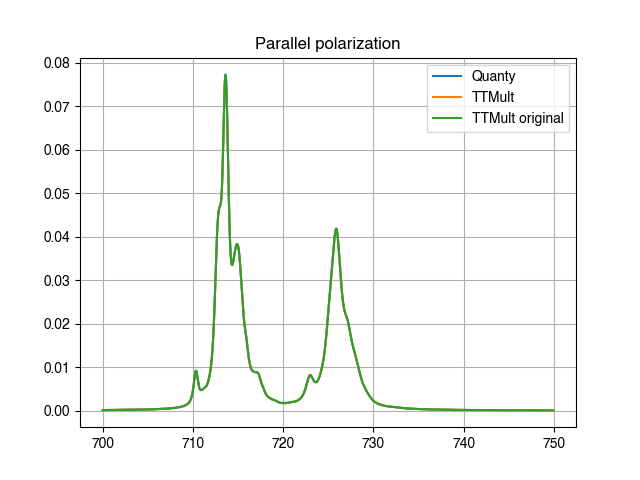

In [8]:
fig, ax = plt.subplots()
ax.grid()

x, y = read_quanty_spectrum('Quanty/input_k.spec')
ax.plot(x + SHIFT, y, label='Quanty')

x, y, xsticks, ysticks = read_ttmult_spectrum('TTMult/input-parallel2K.xy')
ax.plot(x, y, label='TTMult')

x, y, xsticks, ysticks = read_ttmult_spectrum('TTMult/original/fe3-C3v-Bz-parallel.xy')
ax.plot(x, y, label='TTMult original')

plt.title('Parallel polarization')
ax.legend()

<IPython.core.display.Javascript object>


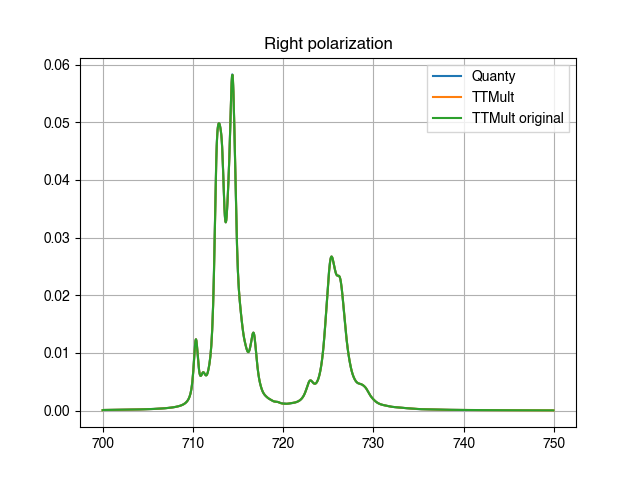

In [9]:
fig, ax = plt.subplots()
ax.grid()

x, y = read_quanty_spectrum('Quanty/input_r.spec')
ax.plot(x + SHIFT, y, label='Quanty')

x, y, xsticks, ysticks = read_ttmult_spectrum('TTMult/input-right2K.xy')
ax.plot(x, y, label='TTMult')

x, y, xsticks, ysticks = read_ttmult_spectrum('TTMult/original/fe3-C3v-Bz-right2K.xy')
ax.plot(x, y, label='TTMult original')

plt.title('Right polarization')
ax.legend()

<IPython.core.display.Javascript object>


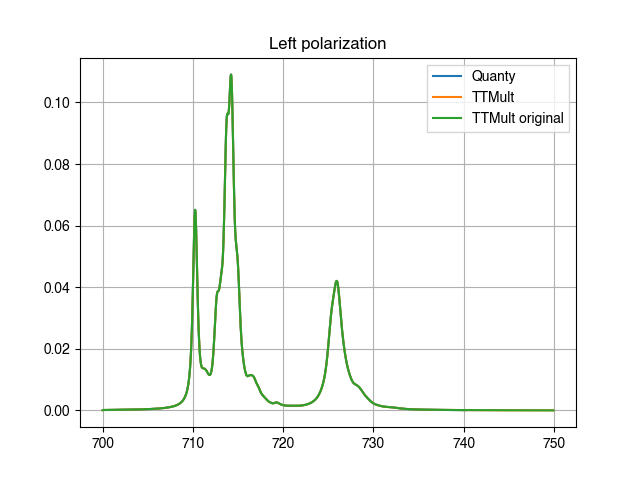

In [10]:
fig, ax = plt.subplots()
ax.grid()

x, y = read_quanty_spectrum('Quanty/input_l.spec')
ax.plot(x + SHIFT, y, label='Quanty')

x, y, xsticks, ysticks = read_ttmult_spectrum('TTMult/input-left2K.xy')
ax.plot(x, y, label='TTMult')

x, y, xsticks, ysticks = read_ttmult_spectrum('TTMult/original/fe3-C3v-Bz-left2K.xy')
ax.plot(x, y, label='TTMult original')

plt.title('Left polarization')
ax.legend()

<IPython.core.display.Javascript object>


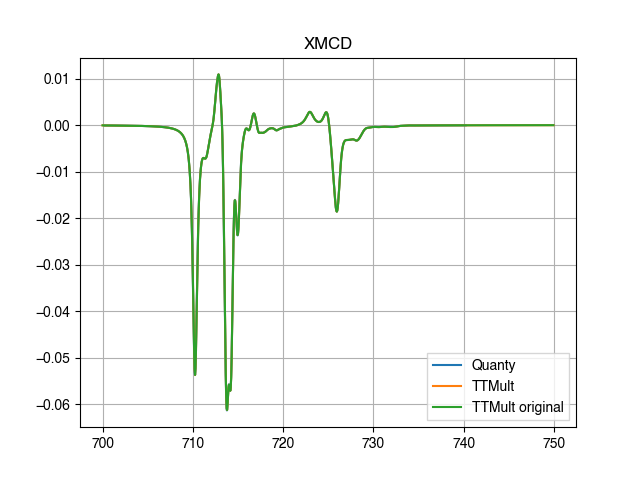

In [11]:
fig, ax = plt.subplots()
ax.grid()

x, y = read_quanty_spectrum('Quanty/input_cd.spec')
ax.plot(x + SHIFT, y, label='Quanty')
xcd_quanty = x
ycd_quanty = y

x, y, xsticks, ysticks = read_ttmult_spectrum('TTMult/input-xmcd2K.xy')
ax.plot(x, y, label='TTMult')
xcd_ttmult = x
ycd_ttmult = y

x, y, xsticks, ysticks = read_ttmult_spectrum('TTMult/original/fe3-C3v-Bz-xmcd2K.xy')
ax.plot(x, y, label='TTMult original')

plt.title('XMCD')
ax.legend()

# Sum rules

3$\int_{Iso} = \frac{4l + 2 - n_d}{(2l + 1)}$ 

In [12]:
nd_calculation = 5
nd_sum_rule = 10 - 3 * 5 * np.trapz(yiso_quanty, xiso_quanty)

print('nd (calculation) = {:f}'.format(nd_calculation))
print('nd (sum rule)    = {:f}'.format(nd_sum_rule))

nd (calculation) = 5.000000
nd (sum rule)    = 5.059538


$\langle L_z \rangle = \frac{2}{3} \frac{\int_{XMCD}}{\int_{Iso}} (10 - n_d)$

In [18]:
Lz_calculation = -1.392591
Lz_sum_rule = 2. / 3. * np.trapz(ycd_ttmult, xcd_ttmult) / np.trapz(yiso_ttmult, xiso_ttmult) * (10 - nd_calculation)
Lz_sum_rule = np.trapz(ycd_ttmult, xcd_ttmult) / np.trapz(yiso_ttmult, xiso_ttmult) * 10. / 3.

print('Lz (calculation) = {:f}'.format(Lz_calculation))
print('Lz (sum rule)    = {:f}'.format(Lz_sum_rule))

Lz (calculation) = -1.392591
Lz (sum rule)    = -1.393155


In [17]:
Lz_calculation = -1.392591
Lz_sum_rule = 2. / 3. * np.trapz(ycd_quanty, xcd_quanty) / np.trapz(yiso_quanty, xiso_quanty) * (10 - nd_calculation)

print('Lz (calculation) = {:f}'.format(Lz_calculation))
print('Lz (sum rule)    = {:f}'.format(Lz_sum_rule))

Lz (calculation) = -1.392591
Lz (sum rule)    = -1.394144
